# Problem 4
# Best-Practices Handbook: Addressing Multicollinearity in Regression Modeling

## 1. Definition
**Multicollinearity** occurs when two or more independent variables in a regression model are highly correlated, leading to unreliable estimates of the coefficients. Mathematically, if $X_1, X_2, \ldots, X_k$ are the independent variables, multicollinearity is present if:

$$
\text{Corr}(X_i, X_j) \approx 1 \quad \text{or} \quad \text{Corr}(X_i, X_j) \approx -1 \quad \text{for } i \neq j
$$

This results in inflated standard errors for the coefficients, making hypothesis tests unreliable.

## 2. Description
Multicollinearity complicates the interpretation of regression coefficients, as it becomes difficult to determine the individual effect of each predictor on the dependent variable. It can lead to unstable estimates and reduced statistical power.

In simpler terms: severe multicollinearity causes the model to become more sensitive to change in input data. **This is BAD for a quantitative model or strategy in practice**

## 3. Demonstration
### Numerical Example
Consider a simulated dataset with three independent variables $X_1$, $X_2$, and $X_3$:

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Simulating data
np.random.seed(0)
X1 = np.random.normal(0, 1, 100)
X2 = X1 + np.random.normal(0, 0.1, 100)  # Highly correlated with X1
X3 = np.random.normal(0, 1, 100)
X4 = np.random.normal(0, 1, 100)
X5 = np.random.normal(0, 1, 100)
Y = 3 + 2 * X1 + 1.5 * X2 + 1.0 * X3 + 0.5 * X4 + 0.25 * X5 + np.random.normal(0, 1, 100)

data = pd.DataFrame({'Y': Y, 'X1': X1, 'X2': X2, 'X3': X3, 'X4': X4, 'X5': X5})

# Fitting a regression model
X = sm.add_constant(data[['X1', 'X2', 'X3', 'X4', 'X5']])
model = sm.OLS(data['Y'], X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     298.7
Date:                Thu, 12 Sep 2024   Prob (F-statistic):           4.64e-56
Time:                        22:50:34   Log-Likelihood:                -137.88
No. Observations:                 100   AIC:                             287.8
Df Residuals:                      94   BIC:                             303.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8705      0.102     28.170      0.0

### Visual Example

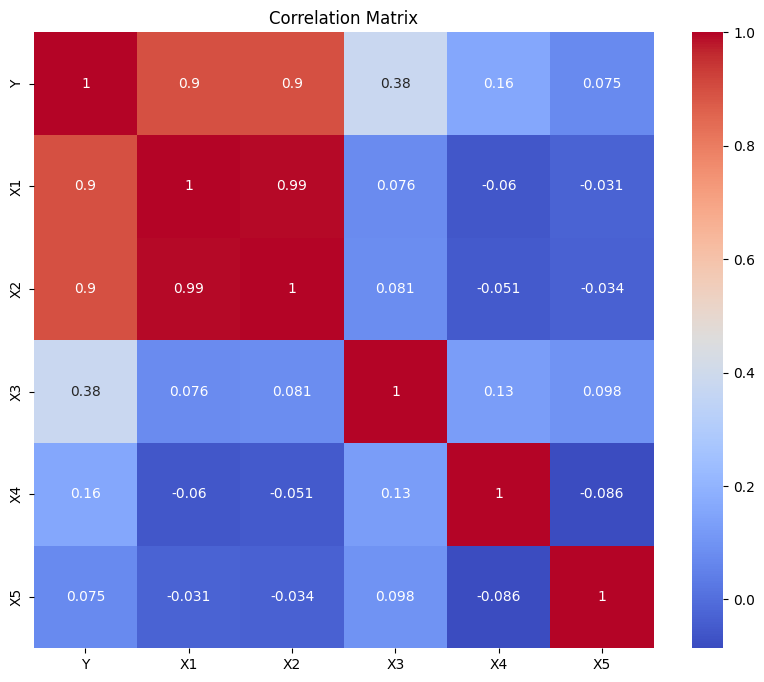

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizing the correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [3]:
# Show SE of the variables
print(model.bse)


const    0.101900
X1       0.984416
X2       0.968277
X3       0.106081
X4       0.108631
X5       0.096629
dtype: float64


### Output Interpretation
The OLS regression summary shows us the inflated standard errors for $X_1$ and $X_2$ due to their multicollinearity. 

| Variable | Standard Error |
|----------|----------------|
| const    | 0.101900       |
| X1       | *0.984416*     |
| X2       | *0.968277*     |
| X3       | 0.106081       |
| X4       | 0.108631       |
| X5       | 0.096629       |


The correlation matrix also reflects strong correlation between $X_1$ and $X_2$ as can be seen from the bright orange and red squares.

## 4. Diagnosis
We use the following to measure the amount of multicollinearity:

- **Variance Inflation Factor (VIF)**: A VIF value greater than `5` is often taken as an indication of *_severe_* multicollinearity. While a VIF value between `1` and `5` indicates no severe multicollinearity issue. This is defined for $x_i$ as:
  
$$
VIF_i = \frac{1}{1 - R^2_i}
$$

Where $R^2_i$ is the R-squared value obtained by regressing the $x_i$ against all other independent variables.

### Obtaining VIF outputs

In [4]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["Feature/Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

  Feature/Variable         VIF
0            const    1.057647
1               X1  100.269312
2               X2  100.256218
3               X3    1.038820
4               X4    1.038162
5               X5    1.023083


From the VIFs:
- Both predictor variables `X1` and `X2` have very large VIFs
- For e.g. the VIF of `X1` = `100.2693` > `5`. This number indicates severe multicollinearity among `X1` and `X2`
- For the rest of the variables, multicollinearity is not a big concern

## 5. Discussion
### Consequences
The presence of multicollinearity can:
- Lead to large standard errors, making hypothesis tests unreliable.
- Cause coefficients to change dramatically with small changes in the model or data.

### Techniques to Address Multicollinearity
1. **Remove Variables**: Consider removing one of the correlated variables.
2. **Combine Variables**: Create composite indices or use principal component analysis (PCA) to reduce dimensionality.
3. **Regularization Techniques**: Use Lasso or Ridge regression, which can handle multicollinearity by adding a penalty term to the loss function.

### Practical Recommendations
- Always check for multicollinearity using VIF before finalizing your regression model.
- If multicollinearity is detected, consider the context of the variables and choose the most relevant ones for your analysis.
